In [1]:
from pycocotools.coco import COCO

In [2]:
data_types = {
    'validation': {
        'name': 'val2017',
        'subset_fraction': 1
    },

    'test': {
        'name': 'test2017',

    },

    'train':{


    }

}

In [ ]:
# TODO: Select from data_types keys
dtype = data_types['validation']
dname = dtype['name']
subset_fraction = dtype['subset_fraction']

assert 0 < subset_fraction < 1, "Subset fraction must be greater than 0 and smaller than 1"

print(f"Selected data split is {dname}")
print(f"Selected subset_fraction is {subset_fraction}")

Selected data split is val2017
Selected subset_fraction is 1


In [4]:
coco = COCO(f'annotations/instances_{dname}.json')
category_counts = {}
for ann in coco.dataset['annotations']:
    cat_id = ann['category_id']
    category_counts[cat_id] = category_counts.get(cat_id, 0) + 1

print(category_counts)  # Frequency of each category

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!
{18: 218, 64: 343, 72: 288, 16: 440, 17: 202, 19: 273, 20: 361, 21: 380, 44: 1025, 63: 261, 62: 1791, 67: 697, 2: 316, 3: 1932, 4: 371, 5: 143, 6: 285, 7: 190, 9: 430, 1: 11004, 13: 75, 28: 413, 32: 254, 54: 177, 65: 163, 77: 262, 82: 126, 85: 267, 90: 57, 8: 415, 10: 637, 11: 101, 14: 60, 15: 413, 34: 115, 35: 241, 36: 69, 41: 179, 42: 269, 46: 343, 47: 899, 48: 215, 49: 326, 50: 253, 51: 626, 52: 379, 53: 239, 55: 287, 56: 316, 57: 371, 59: 285, 61: 316, 70: 179, 73: 231, 74: 106, 75: 283, 76: 153, 78: 55, 79: 143, 80: 9, 81: 225, 84: 1161, 86: 277, 87: 36, 88: 191, 89: 11, 27: 371, 31: 540, 33: 303, 22: 255, 24: 268, 38: 336, 58: 127, 60: 338, 25: 232, 39: 146, 40: 148, 37: 263, 23: 71, 43: 225}


In [6]:
coco.dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [7]:
coco.dataset['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [8]:
coco.dataset['annotations'][0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

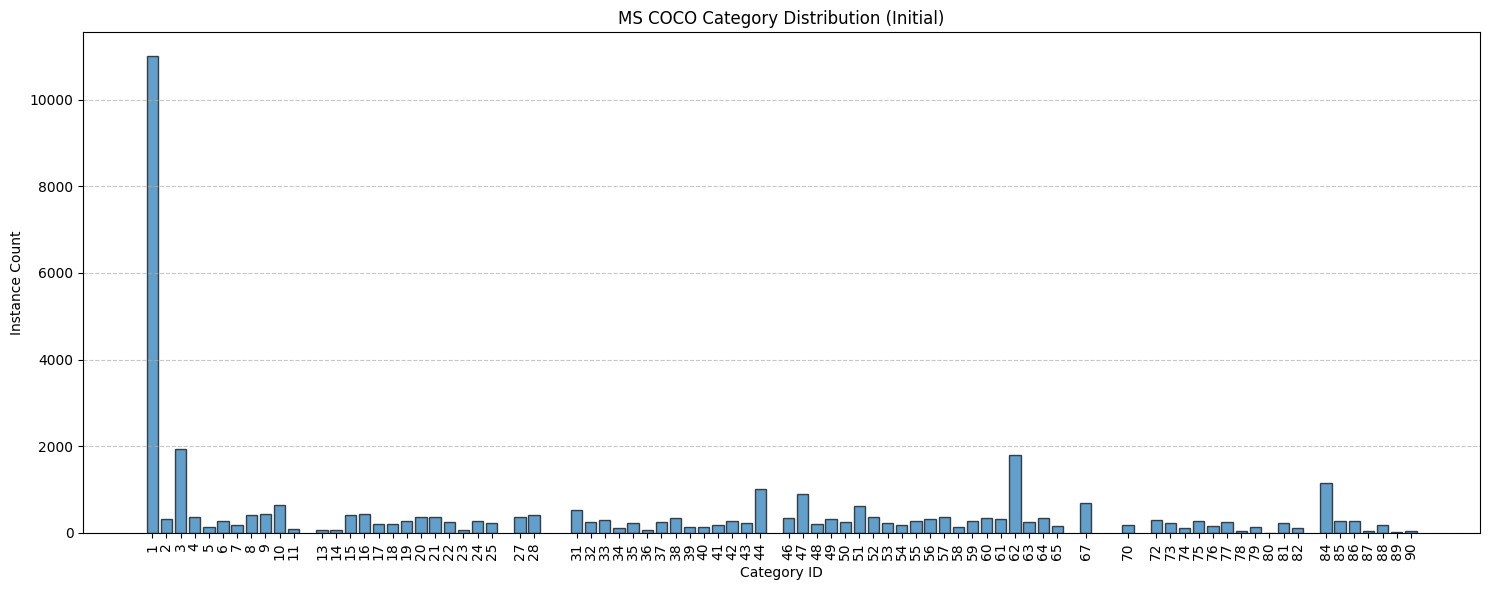

In [9]:
import matplotlib.pyplot as plt

# Sorting by category ID for consistent visualization
sorted_category_counts = dict(sorted(category_counts.items()))

# Extracting category IDs and counts
category_ids = list(sorted_category_counts.keys())
counts = list(sorted_category_counts.values())

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(category_ids, counts, width=0.8, alpha=0.7, edgecolor='black')
plt.xlabel('Category ID')
plt.ylabel('Instance Count')
plt.title('MS COCO Category Distribution (Initial)')
plt.xticks(category_ids, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Determine the subset limit per category
category_limits = {cat_id: int(count * subset_fraction) for cat_id, count in category_counts.items()}

# Create the subset
selected_annotations = []
category_counts_subset = {cat_id: 0 for cat_id in category_counts.keys()}
selected_image_ids = set()

for ann in coco.dataset['annotations']:
    cat_id = ann['category_id']
    if category_counts_subset[cat_id] < category_limits[cat_id]:
        selected_annotations.append(ann)
        selected_image_ids.add(ann['image_id'])
        category_counts_subset[cat_id] += 1


# Plot category distribution for the subset using category IDs
plt.figure(figsize=(15, 6))
plt.bar(category_counts_subset.keys(), category_counts_subset.values(), alpha=0.7, edgecolor='black')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.title('Class Distribution in Subset (Proportional Sampling)')
plt.xticks(list(category_counts_subset.keys()), rotation=90)  # Convert keys to a list
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a new dataset for the subset
subset_dataset = {
    'info': coco.dataset['info'],
    'licenses': coco.dataset['licenses'],
    'images': [img for img in coco.dataset['images'] if img['id'] in selected_image_ids],
    'annotations': selected_annotations,
    'categories': coco.dataset['categories']
}

No subsetting performed since subset_fraction equals 1


In [ ]:
import json

# Save the subset annotations as a JSON file
with open('subset_annotations.json', 'w') as f:
    json.dump(subset_dataset, f)

print("Subset annotations saved as 'subset_annotations.json'")

In [ ]:
import os
import shutil

# Get current working directory
cwd = os.getcwd()

# Create a directory for subset images
os.makedirs('subset_images', exist_ok=True)

# Copy images from the updated path
for img in subset_dataset['images']:
    src_path = os.path.join(cwd, os.path.join('images/test2017', img['file_name']))
    dst_path = os.path.join(cwd ,os.path.join('subset_images', img['file_name']))
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Missing file: {src_path}")

print("Image copying completed!")
